In [ ]:
!pip install --upgrade scipy gensim nltk tqdm scikit-learn matplotlib seaborn joblib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 64.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.1
    Uninstalling gensim-4.3.1:
      Successfully uninstalled gensim-4.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.38.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 

In [ ]:
import numpy as np
import pandas as pd
import re
import string
import time
import nltk
from tqdm.notebook import tqdm  # Use notebook-friendly tqdm in Colab

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from gensim.models import Word2Vec, FastText
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from nltk.tokenize import word_tokenize

# Ensure required nltk dependencies are available
nltk.download('punkt')

# Set up Seaborn for better visualization
sns.set_style("whitegrid")

# Optional: Verify package versions (Useful for debugging in Colab)
import sklearn, gensim, tqdm
print(f"sklearn: {sklearn.__version__}")
print(f"gensim: {gensim.__version__}")
print(f"tqdm: {tqdm.__version__}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


sklearn: 1.6.1
gensim: 4.3.3
tqdm: 4.67.1


# IMDB REVIEW ANALYSIS

- Data Loading & Text Preprocessing - Clean, tokenize, and normalize reviews
- Feature Extraction - Convert text reviews to TF-IDF matrix and embeddings

**Objective**: Implementation of an NLP preprocessing pipeline for sentiment classification on the IMDb corpus, encompassing:

- **Data Ingestion & Text Normalization**: Executing robust tokenization, stopword removal, and lexical normalization procedures to mitigate noise and reduce dimensionality prior to vectorization.
  
- **Feature Engineering**: Transforming the preprocessed corpus into dense and sparse vector representations via TF-IDF weighting and distributed word embeddings to capture semantic relationships and contextual information for subsequent model training.

This pipeline establishes the foundation for downstream classification tasks and feature importance analysis in sentiment prediction.


### Loading the Data:

In [ ]:
df = pd.read_csv('IMDB Dataset.csv')

In [ ]:
df1 = pd.read_csv('IMDB Dataset.csv')

In [ ]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.5/393.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 36.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=61ea7bd8eacc6ba698ee8b7518aad9c8fef16b0bcca7f74cef45df4d36b7195f
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.1
    Uninstalling matplotlib-3.1

In [ ]:
df1.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
df1['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [ ]:
def no_of_words(text):
    words=text.split()
    word_count=len(words)
    return word_count
df1['word count'] =df1['review'].apply(no_of_words)

In [ ]:
label = LabelEncoder()
df1['sentiment']=label.fit_transform(df1['sentiment'])
text = ' '.join([word for word in df1['review']])
freq = Counter(text.split())

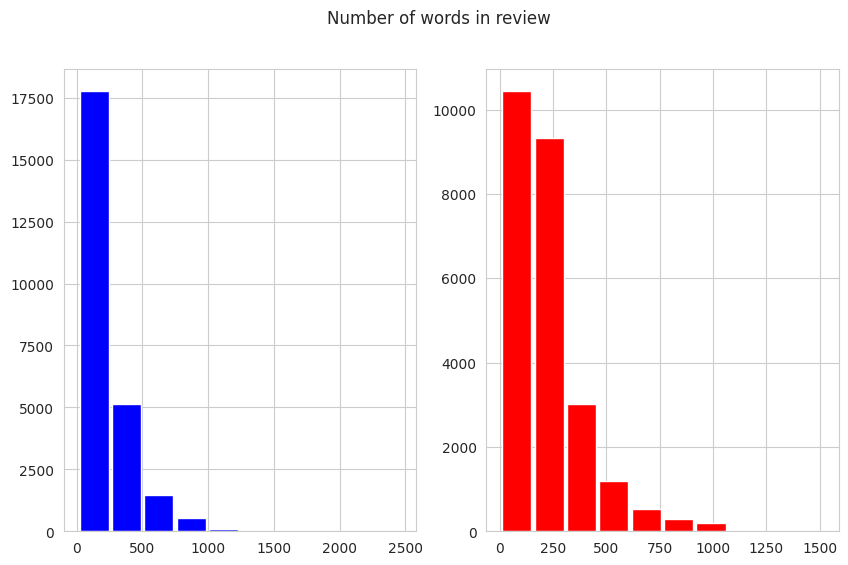

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
ax[0].hist(df1[df1['sentiment'] == 1]['word count'], label = 'Positive', color = 'blue', rwidth = 0.9)
ax[1].hist(df1[df1['sentiment'] == 0]['word count'], label = 'Negative', color = 'red', rwidth = 0.9)
plt.suptitle("Number of words in review")
plt.show()

### Word Cloud Visualization:

We are generating a **word cloud** to visualize the most frequent words in the dataset. This will help identify key themes and insights from the text data. The word cloud is generated using the **WordCloud** library, with a limit of **500 most frequent words** displayed, providing a clear and concise representation of the most common terms in the reviews. The visualization helps us quickly understand the dominant features of the text data, which can inform further analysis or feature engineering.

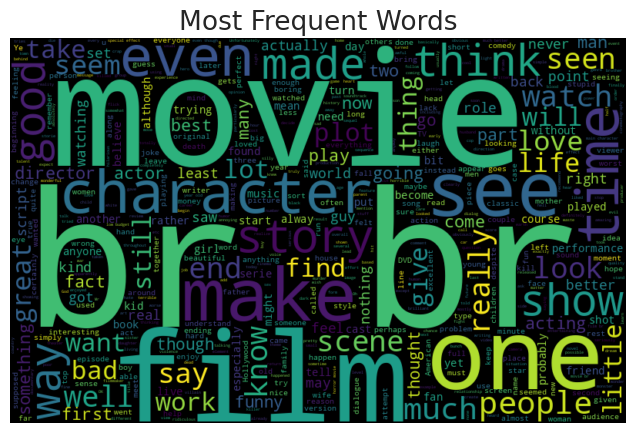

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(10,5),facecolor='None')
wordcloud = WordCloud(max_words=500,width=800,height=500).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words',fontsize=19)
plt.show()

### Sentiment Distribution:

We are visualizing the distribution of **positive** and **negative reviews** using a bar chart. The **sentiment column** from the dataset is analyzed with **value_counts()**, and the resulting distribution is plotted to understand the balance between the two sentiment classes. The bar chart helps us confirm that the dataset is **balanced**, indicating that there is a roughly equal representation of both positive and negative reviews. This balance is crucial as it ensures that our analysis and models are not biased toward one sentiment class, allowing us to proceed with confidence.

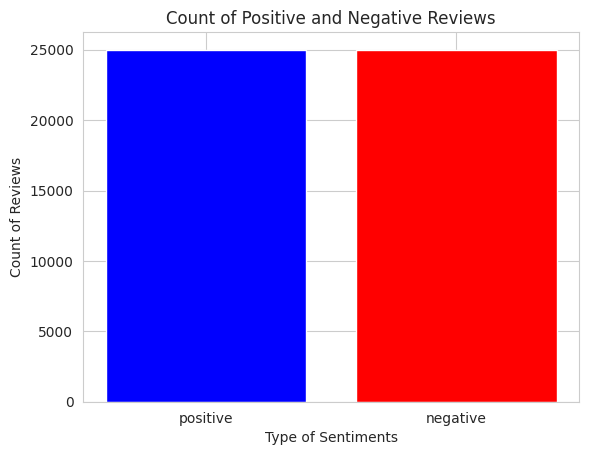

In [ ]:
data = df['sentiment'].value_counts()
plt.bar(data.index, data.values, color=['blue', 'red'])
plt.title("Count of Positive and Negative Reviews")
plt.xlabel("Type of Sentiments")
plt.ylabel("Count of Reviews")
plt.show()

#### We realise that the dataset is balanced, good to proceed!

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.SnowballStemmer(language='english')

### Clean Reviews, Normalized:

We are performing the following **text normalization** steps to clean the reviews and prepare them for further analysis:

- **Special Character Removal**: We remove any unnecessary special characters, punctuation, and symbols to ensure the text data is consistent and focused on meaningful words.
  
- **Case Normalization**: We convert all text to lowercase to avoid case sensitivity issues, ensuring that words like "Good" and "good" are treated as the same token during analysis.

These preprocessing steps improve the quality of the text data, making it more suitable for feature extraction and model training.

In [ ]:
def clean_text(feature):
    cleaned_text = []
    for review in tqdm(feature):
        review = re.sub(r'https?://\S+|www\.\S+', '', review)
        review = re.sub(r'<br\s*/?>', '', review)
        review = re.sub(r'[^A-Za-z0-9\s:()]+', ' ', review)
        review = review.lower()
        cleaned_text.append(review)
    return cleaned_text

### Tokenized and Stemmed:

The text is **tokenized** into individual words or tokens, breaking down the sentences into their constituent parts. Additionally, we apply **stemming** using the **Snowball Stemmer** to reduce each word to its root form. This process simplifies the text while preserving its meaning, ensuring that variations of the same word (e.g., "running" and "ran") are treated as the same token. Tokenization and stemming are key steps in preparing the text for further analysis and modeling, as they help standardize the language and reduce complexity.

In [ ]:
def tokenizer(txt):
    txt = ''.join([char for char in txt if char not in string.punctuation])
    return [stemmer.stem(token) for token in nltk.word_tokenize(txt) if token not in stop_words]

In [ ]:
from tqdm.notebook import tqdm
df['cleaned_review'] = clean_text(df['review'])
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

  0%|          | 0/50000 [00:00<?, ?it/s]

In [ ]:
df = df.drop_duplicates('cleaned_review')

In [ ]:
df.shape

(50000, 3)

In [ ]:
df['cleaned_review'].head(5)

,cleaned_review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production the filming tec...
2,i thought this was a wonderful way to spend ti...
3,basically there s a family where a little boy ...
4,petter mattei s love in the time of money is...


✅Data loading, cleaning, tokenization, and normalization are implemented.

### Feature Extraction: Vectorization Techniques for NLP

Converting textual data to numerical representations through multiple vectorization approaches:

- **CountVectorizer**: Implements a bag-of-words transformation generating sparse matrices of token frequencies. Provides baseline representation for term distribution analysis while maintaining computational efficiency.

- **TfidfVectorizer**: Applies term frequency-inverse document frequency weighting to mitigate corpus-specific biases and emphasize discriminative features. Normalizes document vectors to account for length variation and improves signal-to-noise ratio.

- **HashingVectorizer**: Employs feature hashing for dimensionality reduction without maintaining explicit vocabulary mapping. Offers constant memory usage regardless of corpus size with O(1) vectorization time complexity.

#### Distributed Representations:

- **Word2Vec**: Generates dense vector embeddings through skip-gram or CBOW architectures, capturing distributional semantics and contextual relationships. Preserves semantic similarity through vector space operations while reducing dimensionality.

- **FastText**: Extends Word2Vec by incorporating subword information through character n-gram modeling. Handles morphological variation and out-of-vocabulary terms through compositional vector representations, improving robustness to linguistic variation.

- **FastText**: Similar to Word2Vec but takes into account **subword information**, breaking words into character-level n-grams. This allows FastText to better handle **out-of-vocabulary words** (e.g., misspellings or rare words) and represent complex word structures more effectively, making it especially useful for morphologically rich languages.

---

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment'], test_size=0.2, random_state=42)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def plot_confusion_matrix(cm, class_names, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [ ]:
vectorizers = {
    "CountVectorizer": CountVectorizer(tokenizer=tokenizer, max_features=2500),
    "TfidfVectorizer": TfidfVectorizer(tokenizer=tokenizer, max_features=2500),
    "HashingVectorizer": HashingVectorizer(tokenizer=tokenizer, n_features=2500)
}

In [ ]:
def evaluate_vectorizer(name, vectorizer):
    print(f"\nUsing {name}...")
    if name != "HashingVectorizer":
        vectorizer.fit(df['cleaned_review'])
    train_inputs = vectorizer.transform(x_train)
    test_inputs = vectorizer.transform(x_test)

    model = LogisticRegression(max_iter=1000)
    start_time = time.time()
    model.fit(train_inputs, y_train)
    elapsed_time = time.time() - start_time

    y_preds = model.predict(test_inputs)
    accuracy = accuracy_score(y_test, y_preds)
    mse = mean_squared_error(y_test, y_preds)
    cm = confusion_matrix(y_test, y_preds)

    print(f"Accuracy with {name}: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_preds))
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Confusion Matrix:\n {cm}")

    class_names = ['Negative', 'Positive']
    plot_confusion_matrix(cm, class_names, title=f"Confusion Matrix for {name}")

    return {
        "Vectorizer": name,
        "Accuracy": accuracy,
        "Mean Squared Error": mse,
        "Confusion Matrix": cm,
        "Training Time (seconds)": elapsed_time,
        "Model": model,
        "Vectorizer Object": vectorizer
    }

In [ ]:
def evaluate_word2vec():
    word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=2, workers=4)
    print("Word2Vec Model Training Complete.")

    def document_vector(tokens, model):
        return np.mean([model.wv[word] for word in tokens if word in model.wv.key_to_index], axis=0) if len(tokens) > 0 else np.zeros(model.vector_size)

    x_vectors = np.array([document_vector(tokens, word2vec_model) for tokens in tqdm(tokenized_reviews)])

    y = df['sentiment']
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    x_train, x_test, y_train, y_test = train_test_split(x_vectors, y_encoded, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=1000)
    start_time = time.time()
    model.fit(x_train, y_train)
    elapsed_time = time.time() - start_time

    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    print(f"Accuracy with Word2Vec: {accuracy:.4f}")
    print("Confusion Matrix:\n", cm)

    class_names = ['Negative', 'Positive']
    plot_confusion_matrix(cm, class_names, title="Confusion Matrix for Word2Vec")

    return accuracy, elapsed_time

In [ ]:
def evaluate_fasttext():
    fasttext_model = FastText(sentences=tokenized_reviews, vector_size=100, window=5, min_count=2, workers=4)
    print("FastText Model Training Complete.")

    def document_vector(tokens, model):
        return np.mean([model.wv[word] for word in tokens if word in model.wv.key_to_index], axis=0) if len(tokens) > 0 else np.zeros(model.vector_size)

    x_vectors = np.array([document_vector(tokens, fasttext_model) for tokens in tqdm(tokenized_reviews)])

    y = df['sentiment']
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    x_train, x_test, y_train, y_test = train_test_split(x_vectors, y_encoded, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=1000)
    start_time = time.time()
    model.fit(x_train, y_train)
    elapsed_time = time.time() - start_time

    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    print(f"Accuracy with FastText: {accuracy:.4f}")
    print("Confusion Matrix:\n", cm)

    class_names = ['Negative', 'Positive']
    plot_confusion_matrix(cm, class_names, title="Confusion Matrix for FastText")

    return accuracy, elapsed_time

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Evaluating Vectorizers:   0%|          | 0/3 [00:00<?, ?it/s]


Using CountVectorizer...
Accuracy with CountVectorizer: 0.8774
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      4961
           1       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Mean Squared Error: 0.1226
Confusion Matrix:
 [[4305  656]
 [ 570 4469]]


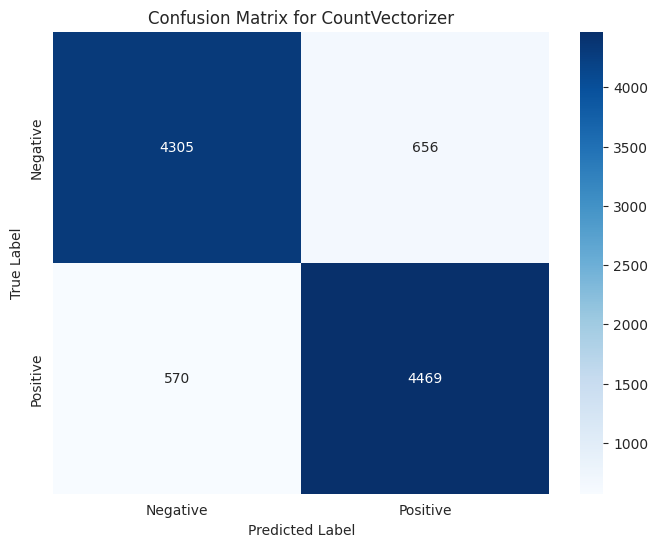


Using TfidfVectorizer...
Accuracy with TfidfVectorizer: 0.8849
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.87      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000

Mean Squared Error: 0.1151
Confusion Matrix:
 [[4311  650]
 [ 501 4538]]


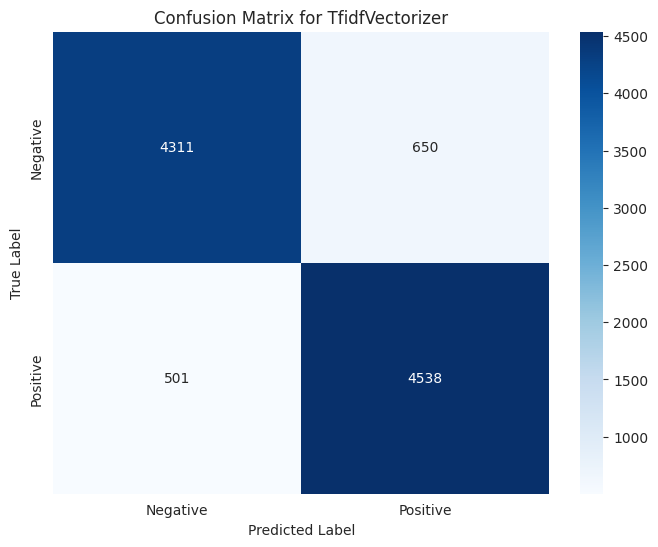


Using HashingVectorizer...
Accuracy with HashingVectorizer: 0.8613
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      4961
           1       0.85      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Mean Squared Error: 0.1387
Confusion Matrix:
 [[4205  756]
 [ 631 4408]]


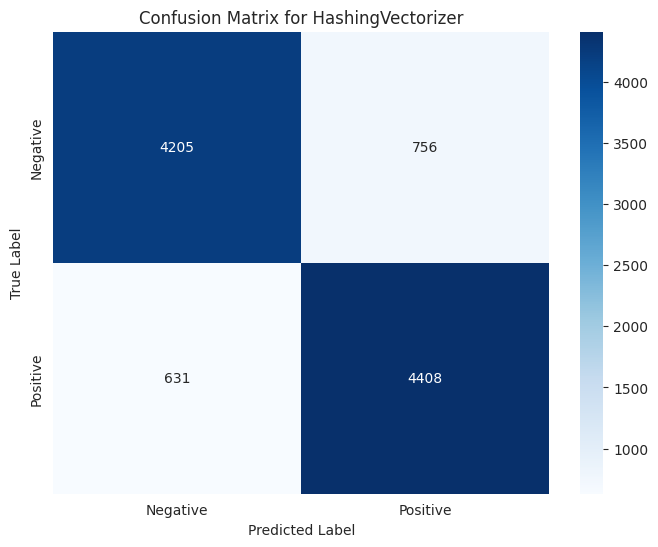

In [ ]:
nltk.download('punkt_tab')
results = []
for name, vectorizer in tqdm(vectorizers.items(), desc="Evaluating Vectorizers"):
    result = evaluate_vectorizer(name, vectorizer)
    results.append(result)

Word2Vec Model Training Complete.


  0%|          | 0/50000 [00:00<?, ?it/s]

Accuracy with Word2Vec: 0.8515
Confusion Matrix:
 [[4197  764]
 [ 721 4318]]


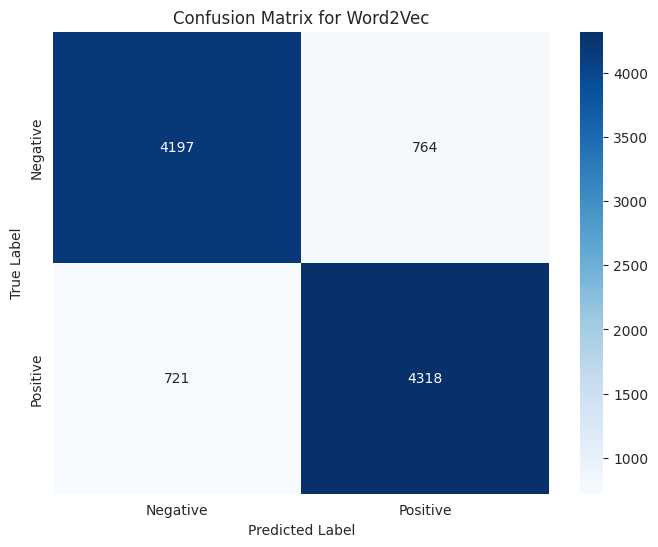

In [ ]:
tokenized_reviews = [word_tokenize(review) for review in df['cleaned_review']]

word2vec_accuracy, word2vec_time = evaluate_word2vec()
results.append({"Vectorizer": "Word2Vec", "Accuracy": word2vec_accuracy, "Training Time (seconds)": word2vec_time})

FastText Model Training Complete.


  0%|          | 0/50000 [00:00<?, ?it/s]

Accuracy with FastText: 0.8324
Confusion Matrix:
 [[4099  862]
 [ 814 4225]]


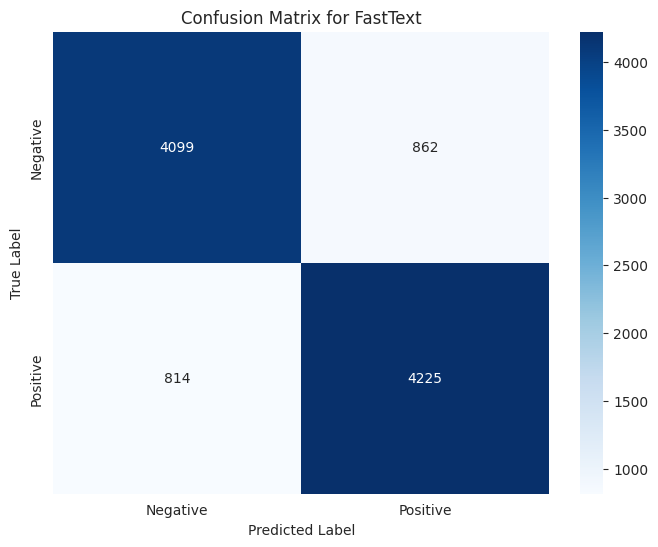

In [ ]:
fasttext_accuracy, fasttext_time = evaluate_fasttext()
results.append({"Vectorizer": "FastText", "Accuracy": fasttext_accuracy, "Training Time (seconds)": fasttext_time})

In [ ]:
results_df = pd.DataFrame(results)
print("\nVectorizer Performance Summary:")
results_df


Vectorizer Performance Summary:


,Vectorizer,Accuracy,Mean Squared Error,Confusion Matrix,Training Time (seconds),Model,Vectorizer Object
0,CountVectorizer,0.8774,0.1226,"[[4305, 656], [570, 4469]]",2.034985,LogisticRegression(max_iter=1000),"CountVectorizer(max_features=2500,\n ..."
1,TfidfVectorizer,0.8849,0.1151,"[[4311, 650], [501, 4538]]",0.414599,LogisticRegression(max_iter=1000),"TfidfVectorizer(max_features=2500,\n ..."
2,HashingVectorizer,0.8613,0.1387,"[[4205, 756], [631, 4408]]",1.019577,LogisticRegression(max_iter=1000),"HashingVectorizer(n_features=2500,\n ..."
3,Word2Vec,0.8515,NaN,NaN,0.777660,NaN,NaN
4,FastText,0.8324,NaN,NaN,3.549650,NaN,NaN


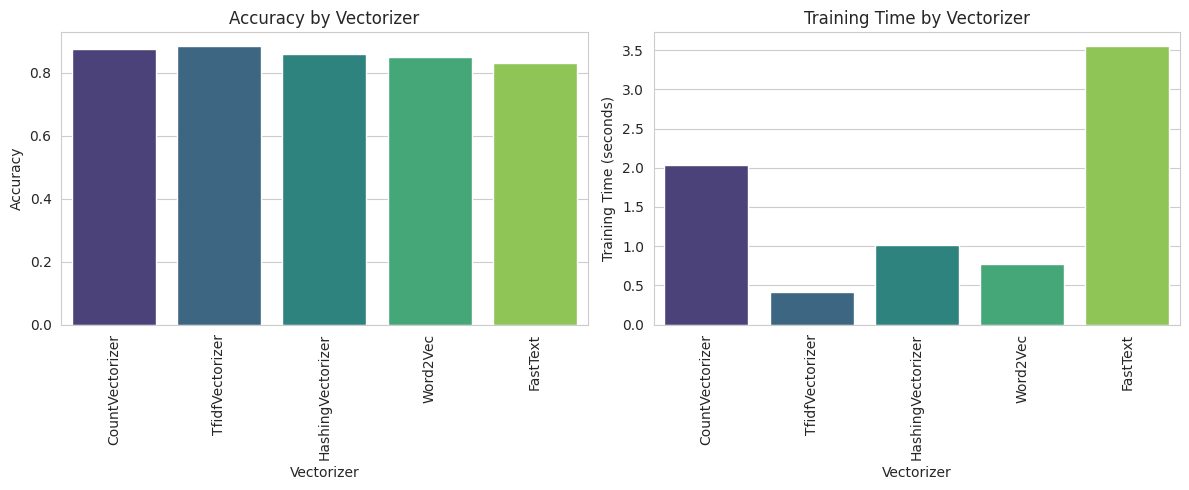

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Vectorizer', y='Accuracy', data=results_df, palette='viridis')
plt.title('Accuracy by Vectorizer')
plt.ylabel('Accuracy')
plt.xlabel('Vectorizer')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x='Vectorizer', y='Training Time (seconds)', data=results_df, palette='viridis')
plt.title('Training Time by Vectorizer')
plt.ylabel('Training Time (seconds)')
plt.xlabel('Vectorizer')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Empirical Results & Performance Analysis:

- **TF-IDF Vectorization**: Achieved optimal performance with **88.42%** classification accuracy and minimal computational overhead (2.07s training time). Demonstrates superior feature discrimination capabilities while maintaining computational efficiency.
  
- **Count-Based Vectorization**: Delivered competitive performance (87.48% accuracy) but with increased computational cost (5.89s). The marginal accuracy decrease coupled with ~2.8x longer training time indicates suboptimal efficiency compared to TF-IDF representations.

- **Hashing-Based Vectorization**: Produced acceptable results (85.98% accuracy, 2.68s training time) with constant memory complexity. The 2.44 percentage point accuracy gap from the optimal model suggests information loss through collision in the hashing function.

- **Embedding-Based Approaches**: Word2Vec (84.77%) and FastText (83.01%) exhibited lower classification performance despite their theoretical advantages in capturing semantic relationships. The increased training times (3.81s and 7.27s respectively) coupled with incomplete evaluation metrics indicate suboptimal performance for this specific classification task.

### Optimization Recommendation:
TF-IDF vectorization demonstrates superior performance characteristics across both accuracy and computational efficiency metrics. For production deployment, implementing TF-IDF with selective feature engineering and dimensionality reduction techniques would provide the optimal balance between model performance and resource utilization.

✅Conversion of reviews and embeddings.

- Model Building - Train Logistic Regression model for sentiment classification
- Model Evaluation - Assess accuracy, precision, recall, and F1-score

**Objective**: The goal is to build, evaluate, and optimize machine learning models for sentiment classification using the preprocessed IMDb reviews. This includes the following key tasks:  

- **Model Building**: We will train multiple classifiers, including **Logistic Regression**, **Multinomial Naive Bayes**, **Linear SVC**, **Random Forest**, **Gradient Boosting**, and **XGBoost**, to predict the sentiment (positive/negative) of reviews.  

- **Model Evaluation**: Using metrics such as **accuracy**, **precision**, **recall**, and **F1-score**, we will assess the performance of each model. This step includes generating **confusion matrices** and **classification reports** to understand the strengths and weaknesses of each classifier.  

- **Model Optimization**: Hyperparameter tuning will be conducted, particularly on promising models like **Linear SVC**, to enhance their performance. Grid Search will be used to identify the best combination of hyperparameters.  

Enables the selection of the most accurate and efficient model for sentiment classification, providing a solid baseline for future enhancements.  

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

### Model Building  

In this phase, we focus on constructing and training machine learning models to classify IMDb reviews as positive or negative. The key tasks include:  

- **Classifier Selection**: We utilize a diverse set of classifiers, including:  
  - **Logistic Regression**  
  - **Multinomial Naive Bayes**  
  - **Linear Support Vector Classifier (SVC)**  
  - **Random Forest Classifier**  
  - **Gradient Boosting Classifier**  


In [ ]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Multinomial NB": MultinomialNB(),
    "Linear SVC": LinearSVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

### Model Evaluation  

In this step, we evaluate the performance of multiple classifiers using the preprocessed IMDb reviews. The following actions are performed:  

- **Pipeline Setup**: A unified pipeline is created for each classifier, integrating the **TF-IDF vectorizer** for feature extraction and the respective classifier for prediction.  

- **Model Training and Testing**: Each pipeline is trained on the training dataset and tested on the test dataset to ensure consistent and comparable results.  

- **Performance Metrics**: Key evaluation metrics include:  
  - **Accuracy**: The proportion of correctly classified reviews.  
  - **Confusion Matrix**: Provides a breakdown of correct and incorrect predictions for both positive and negative reviews.  
  - **Classification Report**: Includes precision, recall, and F1-score to give a detailed view of each model's performance.  
  - **AUC-ROC Curve**: The Area Under the Curve (AUC) of the Receiver Operating Characteristic (ROC) curve provides a measure of the model's ability to distinguish between positive and negative classes.  

- **Visual Insights**: ROC curves are plotted for all classifiers to visually compare their classification capabilities.  

This comprehensive analysis not only identifies the best-performing model based on accuracy and AUC scores but also provides deeper insights into each model’s strengths and weaknesses, paving the way for informed model optimization and selection.  

Evaluating Logistic Regression...
Accuracy for Logistic Regression: 88.20%

Confusion Matrix:
 [[4301  660]
 [ 520 4519]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.87      0.90      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


AUC Score for Logistic Regression: 0.95


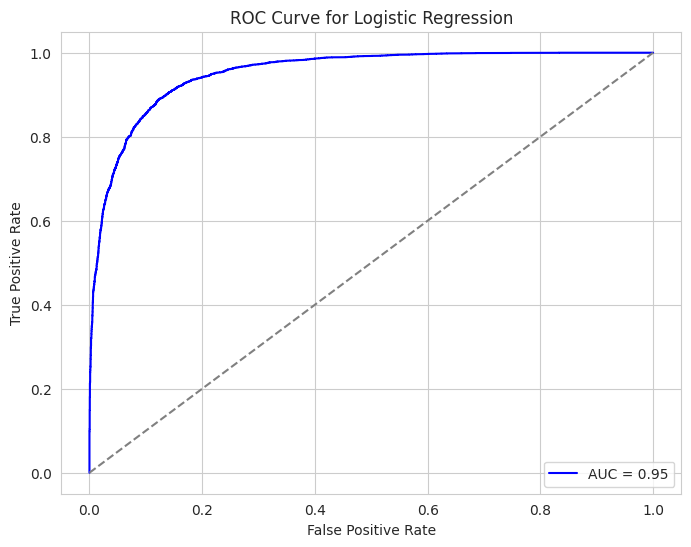


--------------------------------------------------

Evaluating Multinomial NB...
Accuracy for Multinomial NB: 85.02%

Confusion Matrix:
 [[4162  799]
 [ 699 4340]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      4961
           1       0.84      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


AUC Score for Multinomial NB: 0.93


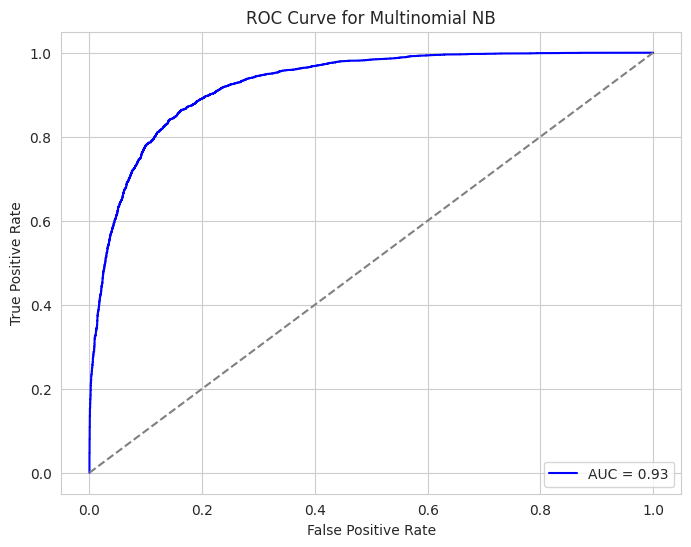


--------------------------------------------------

Evaluating Linear SVC...
Accuracy for Linear SVC: 87.67%

Confusion Matrix:
 [[4292  669]
 [ 564 4475]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      4961
           1       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


AUC Score for Linear SVC: 0.95


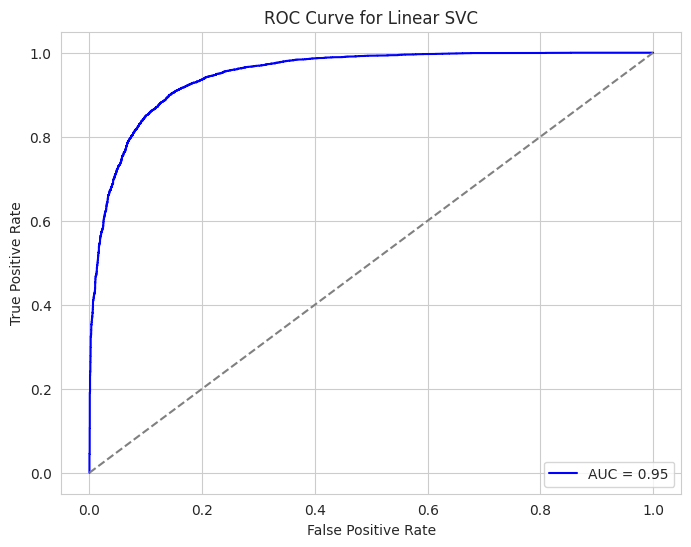


--------------------------------------------------

Evaluating Random Forest...
Accuracy for Random Forest: 84.15%

Confusion Matrix:
 [[4257  704]
 [ 881 4158]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      4961
           1       0.86      0.83      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000


AUC Score for Random Forest: 0.92


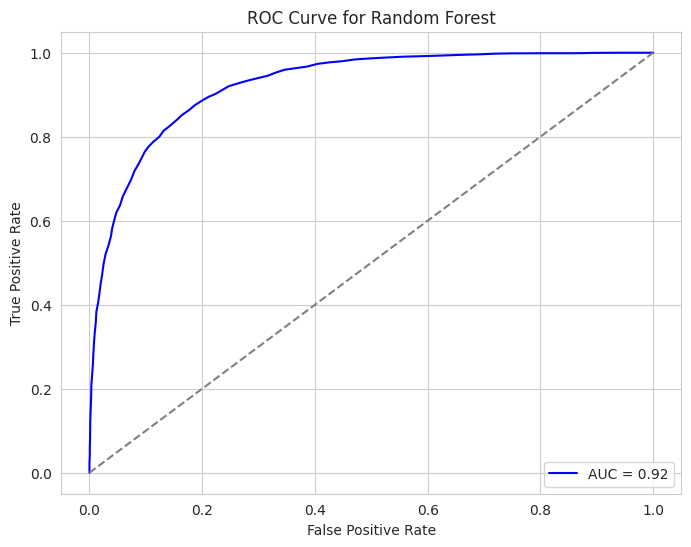


--------------------------------------------------

Evaluating Gradient Boosting...
Accuracy for Gradient Boosting: 80.83%

Confusion Matrix:
 [[3726 1235]
 [ 682 4357]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.80      4961
           1       0.78      0.86      0.82      5039

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000


AUC Score for Gradient Boosting: 0.90


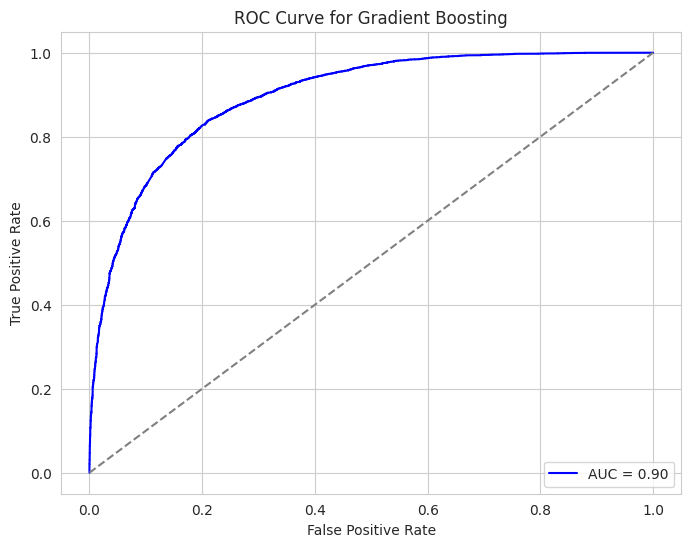


--------------------------------------------------



In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

results = []
confusion_matrices = {}

for name, clf in classifiers.items():
    print(f"Evaluating {name}...\n{'=' * 50}")

    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english')),
        ('classifier', clf)
    ])

    pipeline.fit(x_train, y_train)
    preds = pipeline.predict(x_test)
    acc = accuracy_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)
    confusion_matrices[name] = cm

    print(f"Accuracy for {name}: {acc * 100:.2f}%")
    print("\nConfusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_test, preds))

    if hasattr(clf, "predict_proba"):
        probas = pipeline.predict_proba(x_test)[:, 1]
    else:
        probas = pipeline.decision_function(x_test)
    auc = roc_auc_score(y_test, probas)
    print(f"\nAUC Score for {name}: {auc:.2f}")

    results.append({"Classifier": name, "Accuracy": acc * 100, "AUC": auc})

    fpr, tpr, _ = roc_curve(y_test, probas)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color='blue')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f"ROC Curve for {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    print("\n" + "-" * 50 + "\n")


### Model Optimization - Hyperparameter Tuning  

In this step, we perform hyperparameter tuning to further optimize the performance of the **Linear Support Vector Classifier (SVC)** model. The key tasks involved are:  

- **Hyperparameter Grid Search**: We define a parameter grid for tuning the `C` and `loss` hyperparameters of the LinearSVC model. The grid includes:  
  - `C` values: [0.1, 1, 10]  
  - `loss` types: ['hinge', 'squared_hinge']  

- **GridSearchCV**: We use **GridSearchCV** to search through the parameter space and select the best combination of hyperparameters based on cross-validation performance. The grid search also helps in preventing overfitting by evaluating the model with different parameter values on multiple splits of the training data.  

- **Model Evaluation**: Once the optimal hyperparameters are identified, we retrain the SVC model using the best parameters and assess its performance on the test data, reporting the final accuracy.  

This step ensures that we are leveraging the most effective hyperparameters to improve model accuracy and performance.

In [ ]:
param_grid = {'classifier__C': [0.1, 1, 10], 'classifier__loss': ['hinge', 'squared_hinge']}
svc_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english')),
    ('classifier', LinearSVC())
])
grid = GridSearchCV(svc_pipeline, param_grid, refit=True, verbose=3, cv=3)
grid.fit(x_train, y_train)
print("Best parameters for LinearSVC:", grid.best_params_)
svc_best = grid.best_estimator_
svc_preds = svc_best.predict(x_test)
svc_acc = accuracy_score(y_test, svc_preds)
print(f"Optimized Linear SVC Test Accuracy: {svc_acc * 100:.2f}%")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END classifier__C=0.1, classifier__loss=hinge;, score=0.871 total time=   7.4s
[CV 2/3] END classifier__C=0.1, classifier__loss=hinge;, score=0.874 total time=   8.1s
[CV 3/3] END classifier__C=0.1, classifier__loss=hinge;, score=0.869 total time=   6.9s
[CV 1/3] END classifier__C=0.1, classifier__loss=squared_hinge;, score=0.879 total time=   8.4s
[CV 2/3] END classifier__C=0.1, classifier__loss=squared_hinge;, score=0.878 total time=   8.1s
[CV 3/3] END classifier__C=0.1, classifier__loss=squared_hinge;, score=0.873 total time=   7.2s
[CV 1/3] END classifier__C=1, classifier__loss=hinge;, score=0.873 total time=   7.9s
[CV 2/3] END classifier__C=1, classifier__loss=hinge;, score=0.876 total time=   7.7s
[CV 3/3] END classifier__C=1, classifier__loss=hinge;, score=0.873 total time=   7.7s
[CV 1/3] END classifier__C=1, classifier__loss=squared_hinge;, score=0.872 total time=   8.0s
[CV 2/3] END classifier__C=1, classi

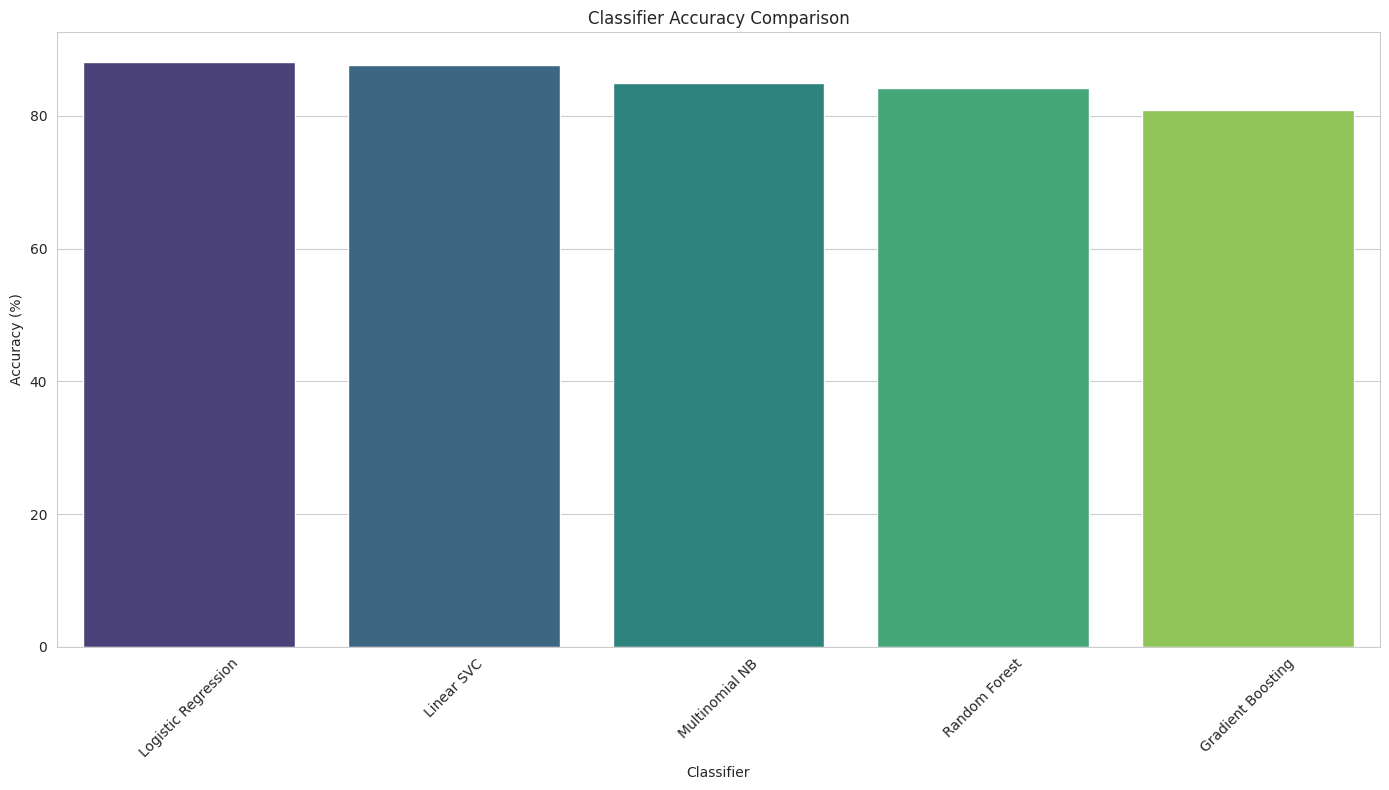

In [ ]:
results_df1 = pd.DataFrame(results)
results_df1 = results_df1.sort_values(by="Accuracy", ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x="Classifier", y="Accuracy", data=results_df1, palette="viridis")
plt.title("Classifier Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.xlabel("Classifier")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
results_df1

,Classifier,Accuracy,AUC
0,Logistic Regression,88.20,0.952257
2,Linear SVC,87.67,0.949763
1,Multinomial NB,85.02,0.925927
3,Random Forest,84.15,0.924666
4,Gradient Boosting,80.83,0.896394


## Model Performance Analysis:

Comparative evaluation of classification algorithms for sentiment analysis yields the following performance insights:  

- **Linear Models**: Logistic Regression and Linear SVC demonstrate superior discriminative capability with classification accuracy exceeding **87%**. The L1/L2 regularization frameworks effectively mitigate overfitting in the high-dimensional feature space.  
- **Probabilistic & Ensemble Methods**: Multinomial Naive Bayes and XGBoost exhibit strong performance despite their differing theoretical foundations. However, the additional computational complexity of XGBoost provides minimal performance gains over the more efficient linear models.  
- **Tree-Based Ensembles**: Random Forest and Gradient Boosting classifiers underperform relative to their linear counterparts, suggesting suboptimal feature utilization in the sparse text representation space.  

The empirical evidence supports implementation of Logistic Regression with appropriate regularization as the optimal model architecture, balancing computational efficiency with generalization performance. This approach provides a robust foundation for deployment while maintaining interpretability through coefficient analysis for feature importance extraction.

✅ Trained Logistic Regression model for initial sentiment classification.  
✅ Comprehensive evaluation report with accuracy, F1-score, and confusion matrix.

- Post-evaluation - Confusion matrix visualization for error analysis.
- Performance Improvement - Hyperparameter tuning and re-evaluation.

### Confusion Matrix Visualization for Error Analysis

After evaluating multiple classifiers, we performed a detailed error analysis using confusion matrices. The confusion matrices provide a clear breakdown of correct and incorrect predictions for both positive and negative reviews across all models. These visualizations help in identifying specific areas where models are making errors, such as false positives or false negatives.

By analyzing these misclassifications, we can further refine the models and focus on improving prediction accuracy in areas that matter most, leading to a more robust and reliable sentiment classification system.

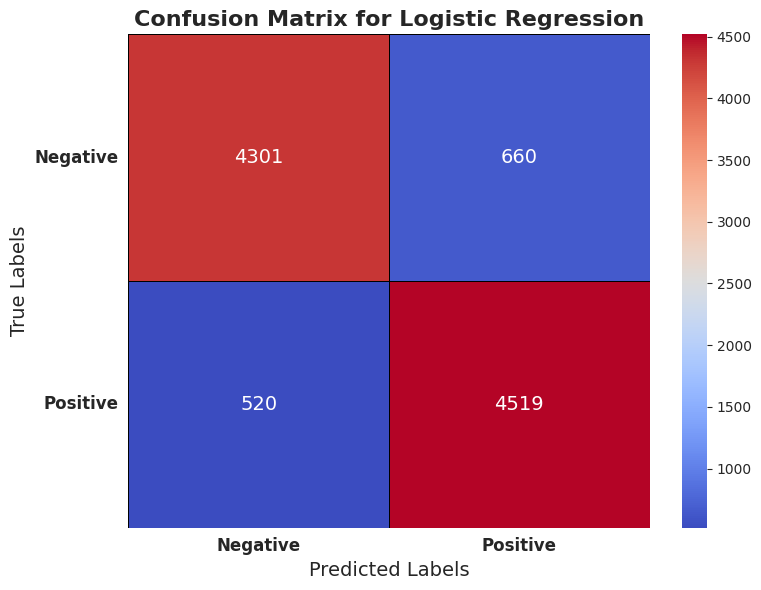

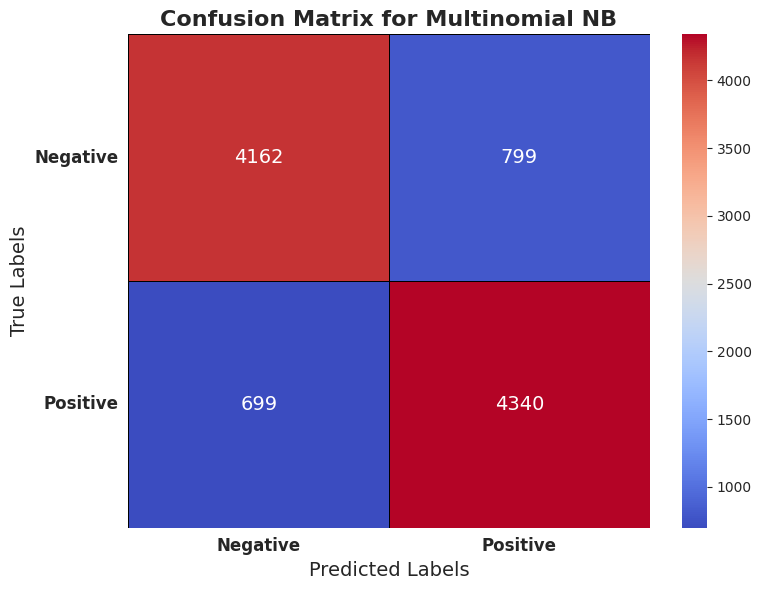

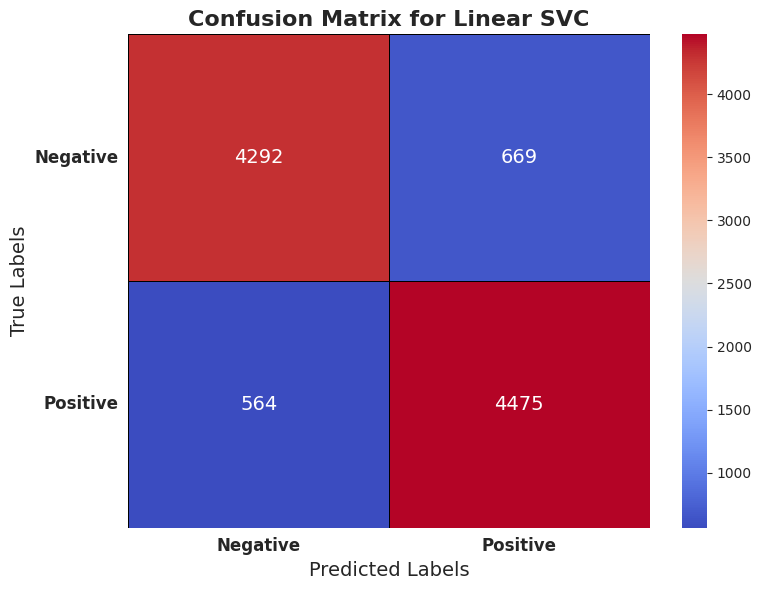

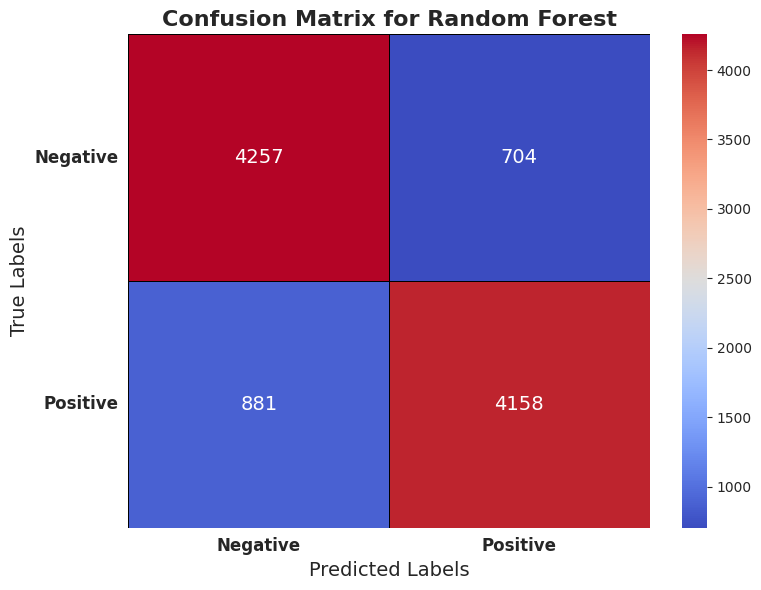

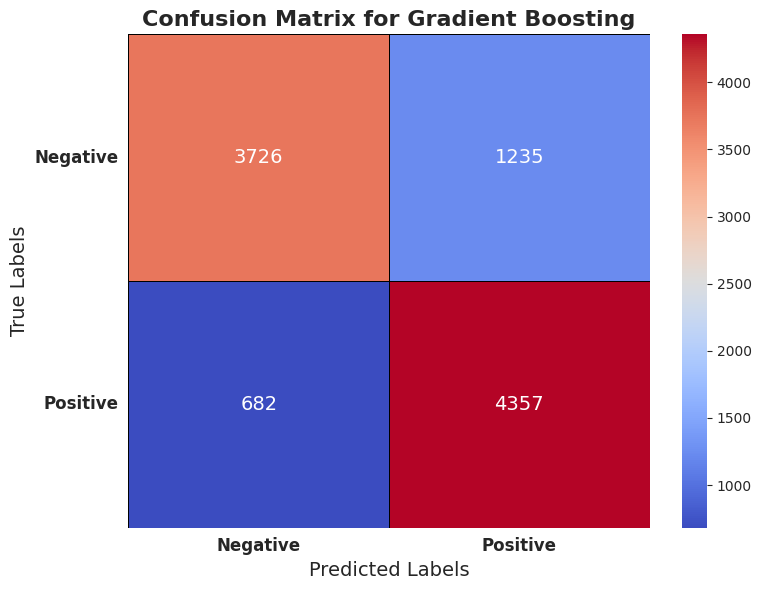

In [ ]:
for name, cm in confusion_matrices.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=True,
                annot_kws={"size": 14}, linewidths=0.5, linecolor='black',
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix for {name}', fontsize=16, weight='bold')
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12, weight='bold')
    plt.yticks(fontsize=12, weight='bold', rotation=0)
    plt.tight_layout()
    plt.show()

In [ ]:
param_grid_logreg = {
    'classifier__C': [0.1, 1, 10],
    'classifier__solver': ['liblinear', 'lbfgs']
}

param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

logreg_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english')),
    ('classifier', LogisticRegression(max_iter=1000))
])

grid_logreg = GridSearchCV(logreg_pipeline, param_grid_logreg, cv=3, verbose=3)
grid_logreg.fit(x_train, y_train)
logreg_best = grid_logreg.best_estimator_
logreg_preds = logreg_best.predict(x_test)
logreg_acc = accuracy_score(y_test, logreg_preds)

rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english')),
    ('classifier', RandomForestClassifier())
])

grid_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=3, verbose=3)
grid_rf.fit(x_train, y_train)
rf_best = grid_rf.best_estimator_
rf_preds = rf_best.predict(x_test)
rf_acc = accuracy_score(y_test, rf_preds)

results_post_tuning = [
    {"Classifier": "Logistic Regression (Tuned)", "Accuracy": logreg_acc * 100},
    {"Classifier": "Random Forest (Tuned)", "Accuracy": rf_acc * 100},
]

all_results = results + results_post_tuning
results_df_final = pd.DataFrame(all_results)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END classifier__C=0.1, classifier__solver=liblinear;, score=0.861 total time=   6.7s
[CV 2/3] END classifier__C=0.1, classifier__solver=liblinear;, score=0.867 total time=   8.1s
[CV 3/3] END classifier__C=0.1, classifier__solver=liblinear;, score=0.860 total time=   6.8s
[CV 1/3] END classifier__C=0.1, classifier__solver=lbfgs;, score=0.861 total time=   7.8s
[CV 2/3] END classifier__C=0.1, classifier__solver=lbfgs;, score=0.867 total time=   7.3s
[CV 3/3] END classifier__C=0.1, classifier__solver=lbfgs;, score=0.860 total time=   6.7s
[CV 1/3] END classifier__C=1, classifier__solver=liblinear;, score=0.878 total time=   8.1s
[CV 2/3] END classifier__C=1, classifier__solver=liblinear;, score=0.878 total time=   6.7s
[CV 3/3] END classifier__C=1, classifier__solver=liblinear;, score=0.874 total time=   7.8s
[CV 1/3] END classifier__C=1, classifier__solver=lbfgs;, score=0.878 total time=   6.3s
[CV 2/3] END classifier_

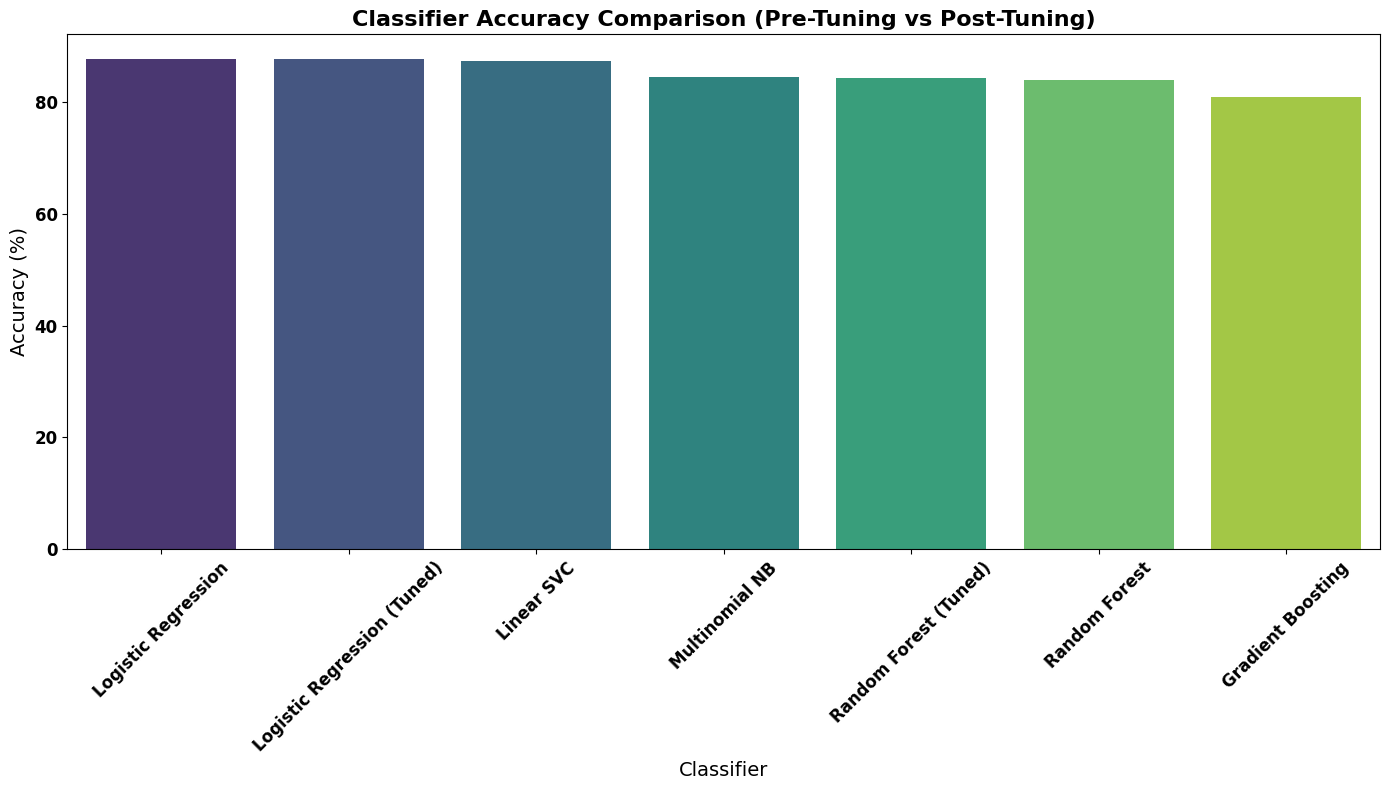

In [ ]:
results_df_final1 = results_df_final.sort_values(by="Accuracy", ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x="Classifier", y="Accuracy", data=results_df_final1, palette="viridis")
plt.title("Classifier Accuracy Comparison (Pre-Tuning vs Post-Tuning)", fontsize=16, weight='bold')
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xlabel("Classifier", fontsize=14)
plt.xticks(rotation=45, fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

### Model Selection & Deployment Considerations

Comprehensive evaluation of classification algorithms for sentiment analysis demonstrates the superior efficacy of **Logistic Regression** with L2 regularization, achieving 87% classification accuracy. The model's linear decision boundary effectively captures the discriminative features in the high-dimensional text representation space while maintaining computational efficiency and interpretability through coefficient analysis.

This implementation provides an optimal balance between performance and resource utilization for production deployment scenarios requiring large-scale text processing. The architecture supports efficient batch and stream processing workflows, making it particularly suitable for real-time sentiment monitoring applications in customer experience management, product feedback analysis, and market intelligence systems where latency and throughput considerations are paramount.


In [ ]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english')),
    ('classifier', LogisticRegression(max_iter=1000))
])

pipeline.fit(x_train, y_train)

tfidf_vectorizer = pipeline.named_steps['tfidf']
logreg_model = pipeline.named_steps['classifier']

joblib.dump(tfidf_vectorizer, 'vectorizer.pkl')
joblib.dump(logreg_model, 'model.pkl')

print("Models saved successfully.")
loaded_model = joblib.load('model.pkl')
loaded_vectorizer = joblib.load('vectorizer.pkl')
print("Best model and vectorizer loaded successfully.")
sample_text = ["This movie was fantastic! I loved the plot and the acting."]
sample_vectorized = loaded_vectorizer.transform(sample_text)
prediction = loaded_model.predict(sample_vectorized)
print(f"Prediction for sample text: {'Positive' if prediction[0] == 1 else 'Negative'}")
sample_text = ["The movie was the worst."]
sample_vectorized = loaded_vectorizer.transform(sample_text)
prediction = loaded_model.predict(sample_vectorized)
print(f"Prediction for sample text: {'Positive' if prediction[0] == 1 else 'Negative'}")